### 네이버 연관 검색어 수집
- 정적(static) 웹페이지 데이터 수집 
- BeautifulSoup을 이용하여 HTML 문자열 데이터 parsing

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### 식별자 컨벤션
- 변수, 함수(snake_case)
- 클래스(PascalCase, UpperCamelCase)

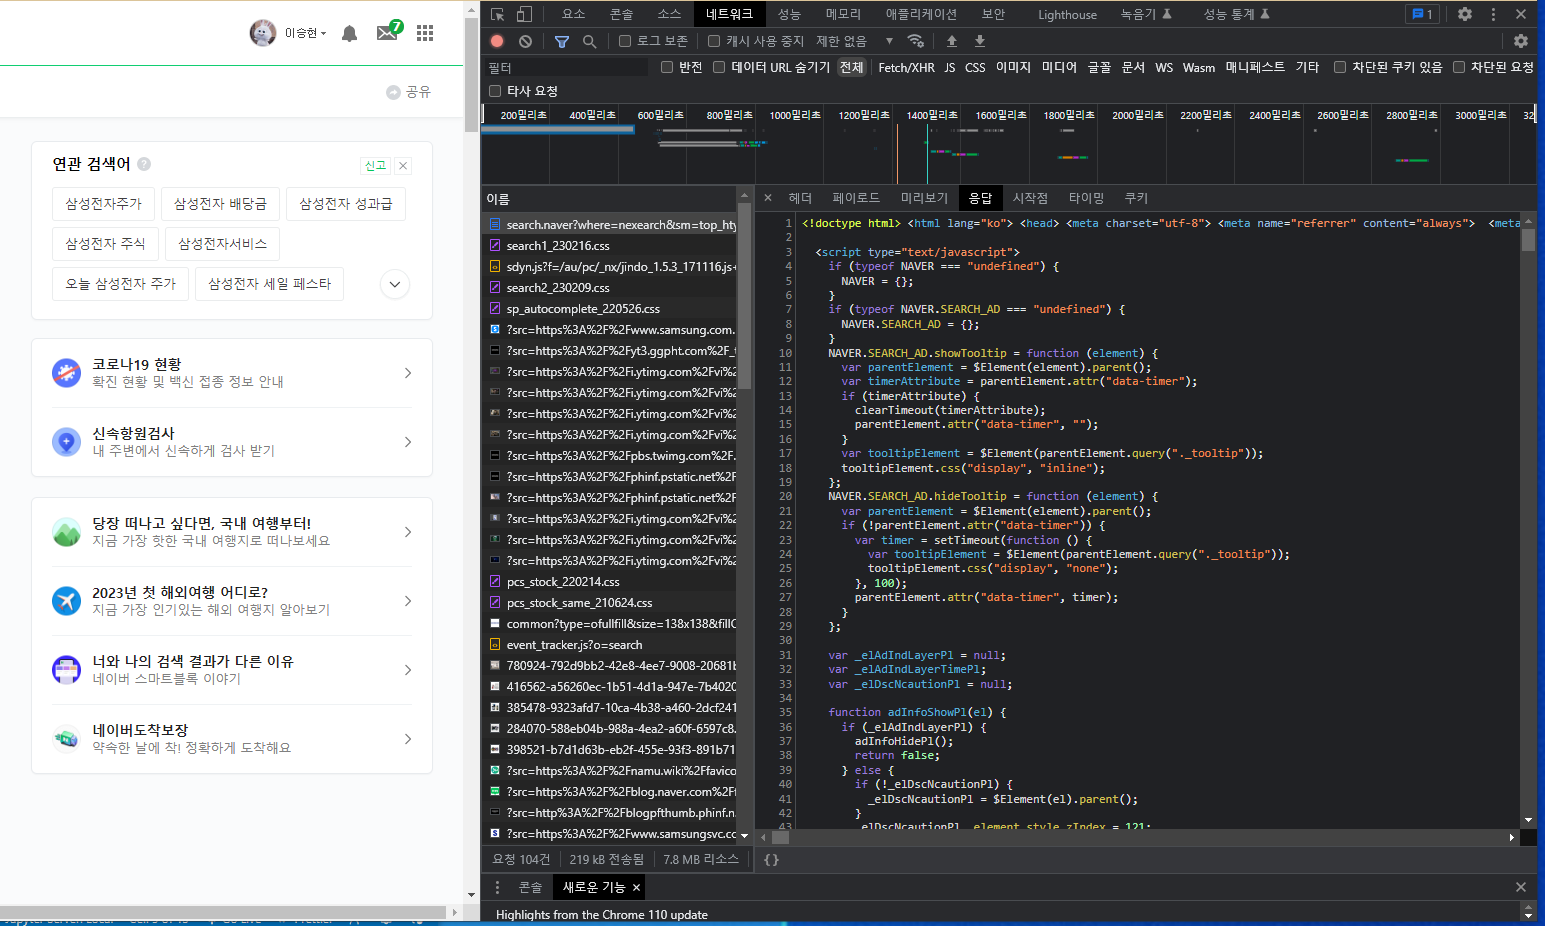

#### 1. 웹페이지 분석 : URL

In [13]:
query = '삼성전자'
url = f'https://search.naver.com/search.naver?query={query}'
url

'https://search.naver.com/search.naver?query=삼성전자'

#### 2. request(URL) > response : str(html)
- 동적에서는 json이었는데 여기선 html이네?
- 받아오는 문자열 포맷이 달라서 파싱하는 방법이 좀 더 복잡하다

In [14]:
response = requests.get(url)
response

<Response [200]>

In [15]:
response.text[:500]

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="삼성전자 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'삼성전자\'의 네이버 통합검색 결과입니다."> <meta name="descript'

#### 3. str(html) > bs object

In [16]:
# html 문자열에 css 셀렉터를 적용하도록 도와주는 클래스가 BeautifulSoup
dom = BeautifulSoup(response.text, 'html.parser') # 클래스로 객체를 만든다. 이 클래스 안에는 수집한 html 문자열을 넣어준다, html 형태로 만들어진다
type(dom)

bs4.BeautifulSoup

#### 4. bs object > .select(css-selector), .select_one(css-selector) > str(text)

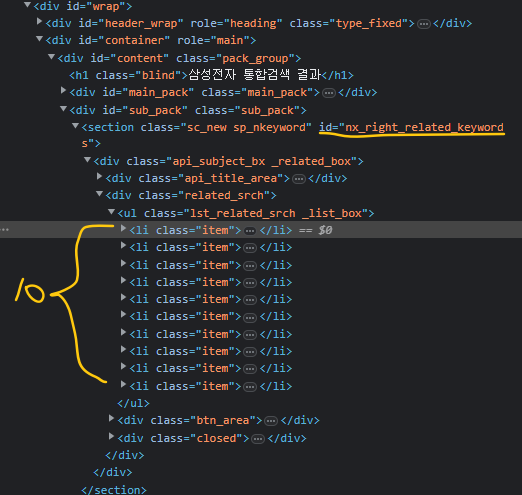

In [ ]:
# 뷰티풀숲 클래스 안에는 셀렉트 메서드와 셀렉트원 메서드가 있는데 이것을 이용해서 css 셀렉터를 이용할 수 있는 것이다.
# 크롬 개발자 도구에서 셀렉터 경로 복사해오기 #nx_right_related_keywords > div > div.related_srch > ul > li:nth-child(1) 였는데 10개를 선택해야 하니까 우리는 nth 지워
#nx_right_related_keywords > div > div.related_srch > ul > li

In [17]:
elements = dom.select('#nx_right_related_keywords > div > div.related_srch > ul > li') # 셀렉트는 리절트셋이긴 한데 리스트 형태로
len(elements)

10

In [18]:
elements[0] # 0번째 엘리먼트를 가져옴 여기서 필요한 건 태그와 태그 사이에 있는 텍스트 데이터임

<li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90%EC%A3%BC%EA%B0%80&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0" onclick="return goOtherCR(this, 'a=rsk_top*q.list1&amp;r=1&amp;u=' + urlencode(this.href))"> <div class="tit">삼성전자주가</div> </a> </li>

In [19]:
element = elements[0]
element.select_one('.tit').text  # 셀렉트원은 하나의 엘리먼트만 선택

'삼성전자주가'

In [20]:
keywords = [element.select_one('.tit').text for element in elements] 
keywords

['삼성전자주가',
 '삼성전자 배당금',
 '삼성전자 성과급',
 '삼성전자 주식',
 '삼성전자서비스',
 '오늘 삼성전자 주가',
 '삼성전자 세일 페스타',
 '삼성전자 배당금 지급일',
 '삼성 전자레인지',
 '삼성전자 감자빵']

#### 5. str(text) > DataFrame

In [21]:
df = pd.DataFrame({'keyword': keywords}) 
df['query'] = query 
df

,keyword,query
0,삼성전자주가,삼성전자
1,삼성전자 배당금,삼성전자
2,삼성전자 성과급,삼성전자
3,삼성전자 주식,삼성전자
4,삼성전자서비스,삼성전자
5,오늘 삼성전자 주가,삼성전자
6,삼성전자 세일 페스타,삼성전자
7,삼성전자 배당금 지급일,삼성전자
8,삼성 전자레인지,삼성전자
9,삼성전자 감자빵,삼성전자
